In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/loan_prediction.csv") # Importing the data

In [3]:
df.head() # Checking the first five elements

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail() # Checking the last five elements

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape # We have 614 rows and 13 columns

(614, 13)

In [6]:
df.info() # Checking basic information of the data frame, we have some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum() # As we can see some of the values are missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

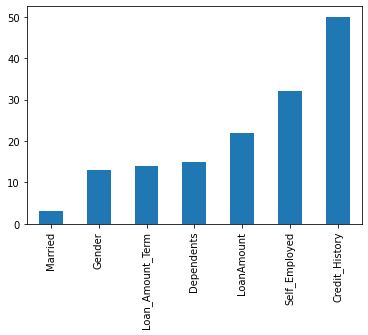

In [8]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar() # Plotting a bar chart of missing values

In [9]:
df.nunique() # How many unique variables does each column have.

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Checking which coulmns have 10 or less than 10 unique values and printing them to ffurther understand our data.

In [10]:
print(df.Gender.unique())
print(df.Married.unique())
print(df.Dependents.unique())
print(df.Education.unique())
print(df.Self_Employed.unique())
print(df.Loan_Amount_Term.unique())
print(df.Credit_History.unique())
print(df.Property_Area.unique())
print(df.Loan_Status.unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ 1.  0. nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

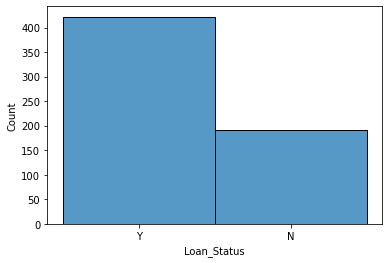

In [11]:
sns.histplot(df['Loan_Status'])

Loan status will be our target variable, it means whether we should give out the loan or not. As we can see we have class imibalance here, which I will fix in a later step. 


### Performing EDA

<AxesSubplot:title={'center':'Gender count of people applying for loans'}, xlabel='Gender'>

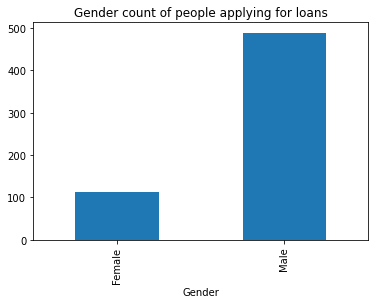

In [12]:
df.groupby(['Gender']).size().plot(kind = "bar",title = 'Gender count of people applying for loans') 

We can observe that, more males apply for loans comparted to females. (approximately five times more males)

<AxesSubplot:title={'center':'Marital status of people applying for loans'}, xlabel='Married'>

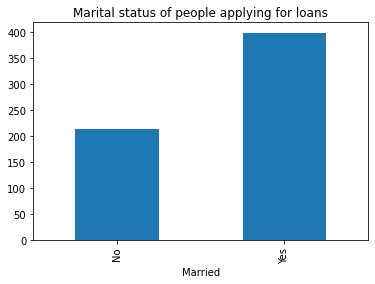

In [13]:
df.groupby(['Married']).size().plot(kind = "bar",title = 'Marital status of people applying for loans') 

We can observe that, people who are married are more than twice likely to apply for a loan than those who are not married.

<AxesSubplot:title={'center':'Dependents of people applying for loans'}, xlabel='Dependents'>

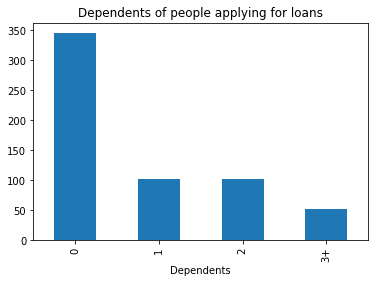

In [14]:
df.groupby(['Dependents']).size().plot(kind = "bar",title = 'Dependents of people applying for loans') 

We can observe that, most of the people appplying for a loan have no dependents under them. People who have 1, 2 or more than 3 dependents are as likely as each other to apply for a loan.

<AxesSubplot:title={'center':'Education level of people applying for loans'}, xlabel='Education'>

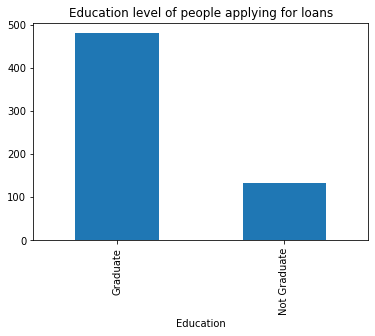

In [15]:
df.groupby(['Education']).size().plot(kind = "bar",title = 'Education level of people applying for loans') 

We can observe that, people who have graduated are thrice as likely to apply for a loan compared to people who don't have a graduate degree.

<AxesSubplot:title={'center':'Employed by status of people applying for loans'}, xlabel='Self_Employed'>

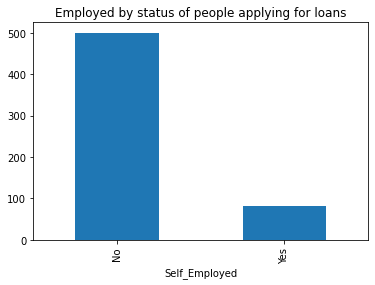

In [16]:
df.groupby(['Self_Employed']).size().plot(kind = "bar",title = 'Employed by status of people applying for loans') 

We can observe that, people who are self employed are less likely to apply for a loan. this could be due to the reason that people who are self employed earn more money.

<AxesSubplot:title={'center':'Length in days of loans'}, xlabel='Loan_Amount_Term'>

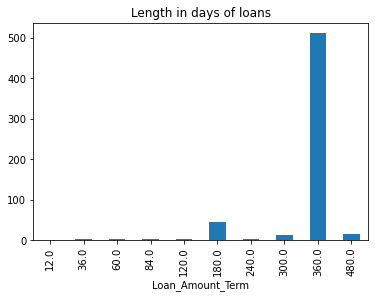

In [17]:
df.groupby(['Loan_Amount_Term']).size().plot(kind = "bar",title = 'Length in days of loans') 

We can observe that, the majority of people apply for a loan period of 360 day, and 180 days being the 2nd most popular choice.

<AxesSubplot:title={'center':'Previous credit history of people applying for loans'}, xlabel='Credit_History'>

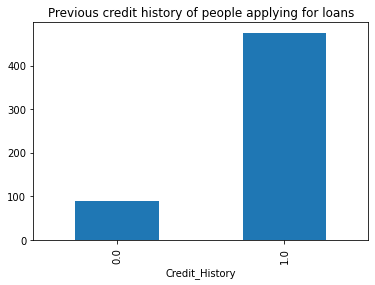

In [18]:
df.groupby(['Credit_History']).size().plot(kind = "bar",title = 'Previous credit history of people applying for loans') 

We can observe that, people who have previously applied for a loan are more likey to apply for a loan again.

<AxesSubplot:title={'center':'Living environment of people applying for loans'}, xlabel='Property_Area'>

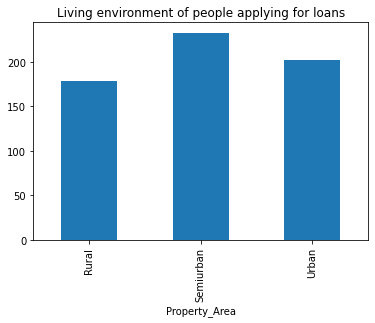

In [19]:
df.groupby(['Property_Area']).size().plot(kind = "bar",title = 'Living environment of people applying for loans') 

We can observe that, all demographic living conditions are ikely to apply for a loan.

<AxesSubplot:title={'center':'Loan status for people applying for loans'}, xlabel='Loan_Status'>

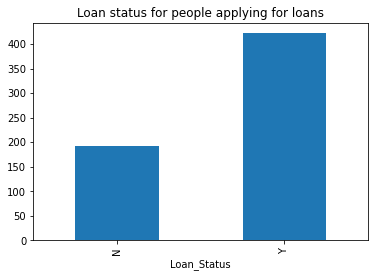

In [20]:
df.groupby(['Loan_Status']).size().plot(kind = "bar",title = 'Loan status for people applying for loans') 

As we can see most of the people are approved for a loan.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

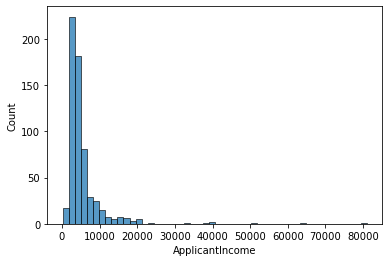

In [21]:
sns.histplot(df['ApplicantIncome'], bins = 50)

Checking the destribution of applicant income, we can observe that the income is skewed to the right.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

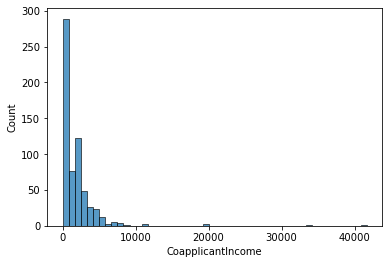

In [22]:
sns.histplot(df['CoapplicantIncome'], bins = 50)

We can observe a similar trend here as the applicant income above, both are skewed to the right.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

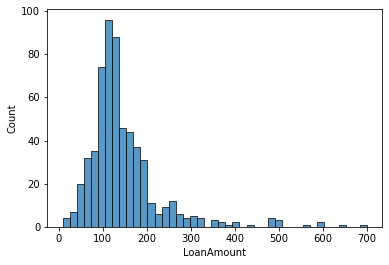

In [23]:
sns.histplot(df['LoanAmount'])

Most of the loan amounts given out are ranging from 80-200.

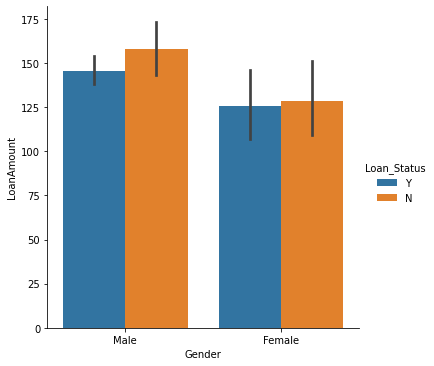

In [24]:
sns.catplot(x = "Gender",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

We can observe that, Males apply for a higher amount of loan as compared to females.

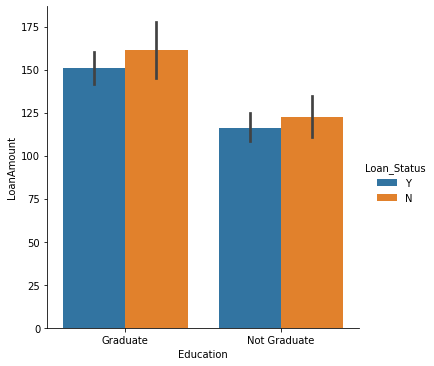

In [25]:
sns.catplot(x = "Education",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

We can observe that, people who have graduated apply for a higher loan amount.

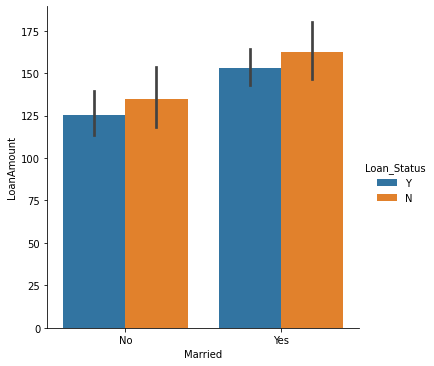

In [26]:
sns.catplot(x = "Married",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

We can observe that, people who are married generally apply for a higher loan amount.

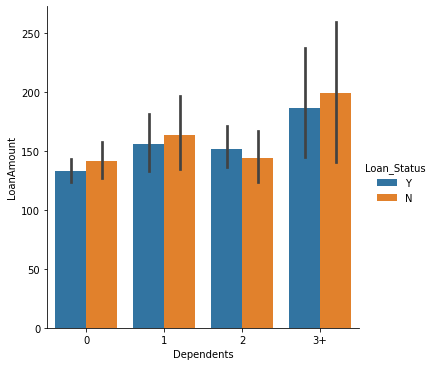

In [27]:
sns.catplot(x = "Dependents",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

We can observe that, people with more dependents apply for a higher loan amount as expected.

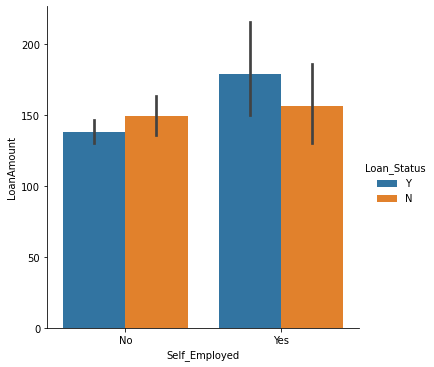

In [28]:
sns.catplot(x = "Self_Employed",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

We can observe that, although people who are self empoyed apply for fewer loans, the amount borrowed is higher. 

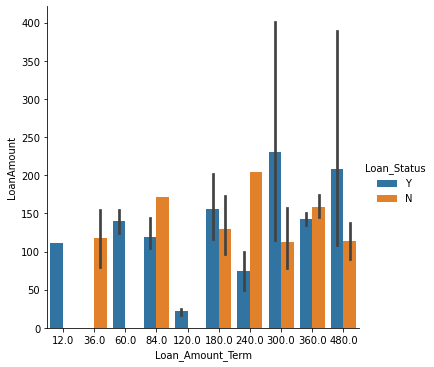

In [29]:
sns.catplot(x = "Loan_Amount_Term",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

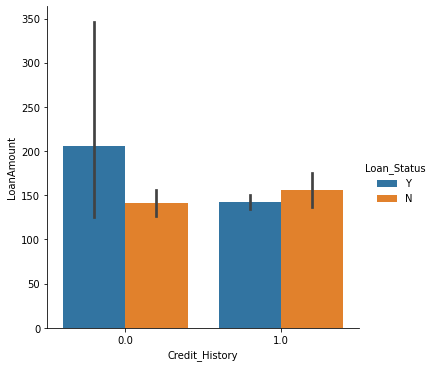

In [30]:
sns.catplot(x = "Credit_History",       # x variable name
            y = "LoanAmount",       # y variable name
            hue = "Loan_Status",  # group variable name
            data = df,     # dataframe to plot
            kind = 'bar')

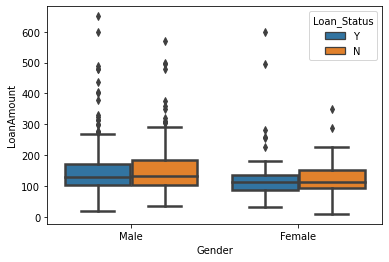

In [31]:
ax=sns.boxplot(x = df["Gender"], y = df['LoanAmount'], hue = df['Loan_Status'],linewidth=2.5)

### Performing kde analysis

<Figure size 432x288 with 0 Axes>

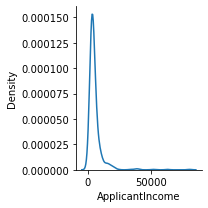

<Figure size 432x288 with 0 Axes>

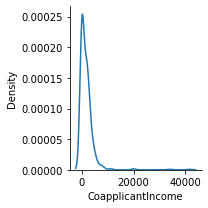

<Figure size 432x288 with 0 Axes>

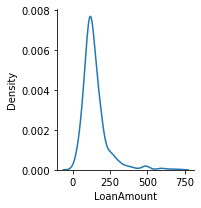

<Figure size 432x288 with 0 Axes>

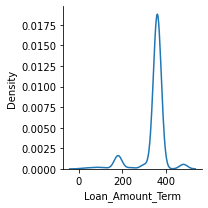

<Figure size 432x288 with 0 Axes>

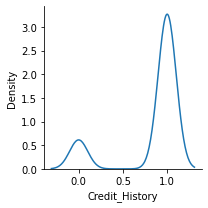

In [32]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

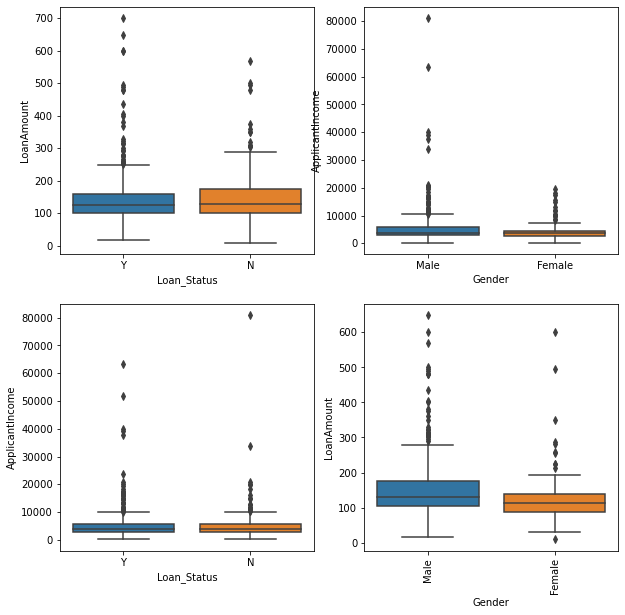

In [33]:
fig,ax = plt.subplots(2,2, figsize=(10,10))                                
sns.boxplot(x=df['Loan_Status'], y=df['LoanAmount'], ax = ax[0,0])     
sns.boxplot(x=df['Gender'], y=df['ApplicantIncome'], ax = ax[0,1])       
plt.xticks( rotation=90)
sns.boxplot(x=df['Loan_Status'],y= df['ApplicantIncome'], ax = ax[1,0])   
plt.xticks( rotation=90)
sns.boxplot(x=df['Gender'],y= df['LoanAmount'], ax = ax[1,1])

plt.show()

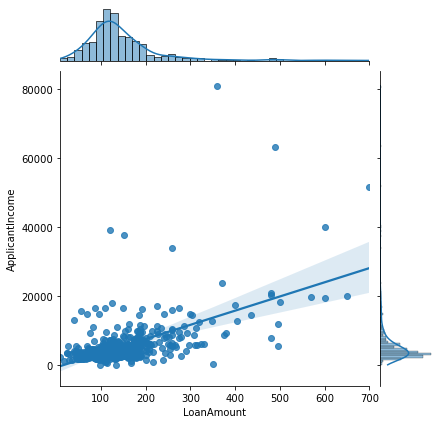

In [34]:
sns.jointplot(x=df.LoanAmount,y=df.ApplicantIncome, kind = "reg")   
plt.show()

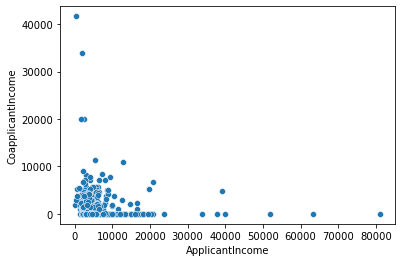

In [35]:
sns.scatterplot(x=df.ApplicantIncome,y=df.CoapplicantIncome)   
plt.show()

### Performing multi-variate analysis

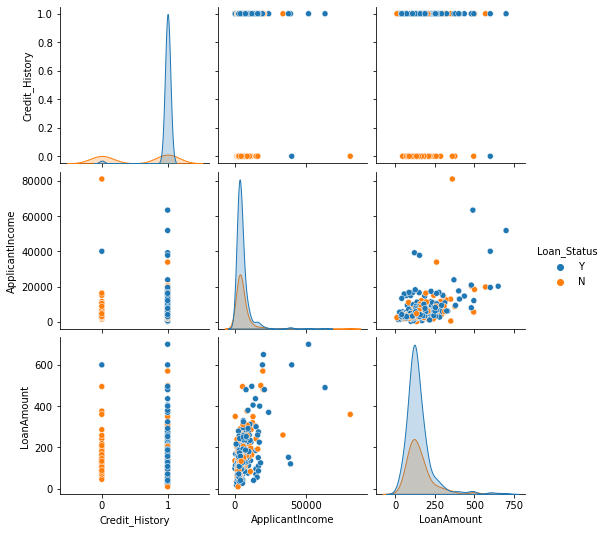

In [36]:
cont_col= ['Credit_History','ApplicantIncome','LoanAmount','Loan_Status']
sns.pairplot(df[cont_col], hue='Loan_Status'  )
plt.show()

In [37]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


PLotting our numeric variables, histogram to check their distribution.

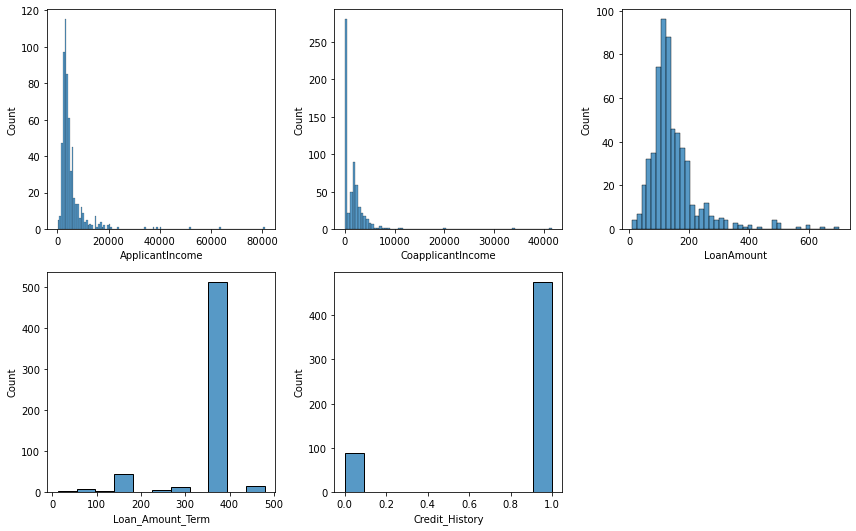

In [38]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,3,i+1)
    sns.histplot(x = numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

In [39]:
cat_vars = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
# Defining our categorical variables.

In [40]:
def plot_cat(var, dataframe):
    plt.figure(figsize=(16, 4))
    sns.countplot(x=var, hue='Loan_Status', data=dataframe)
    plt.show()
    # Defining plot function

Now I will print all the categorical variables as a count plot with a hue towards the loan status.

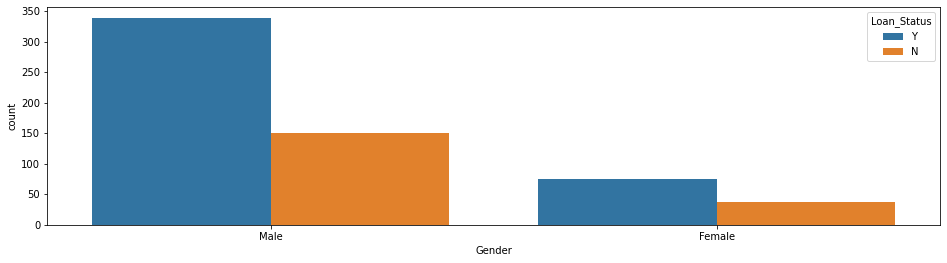

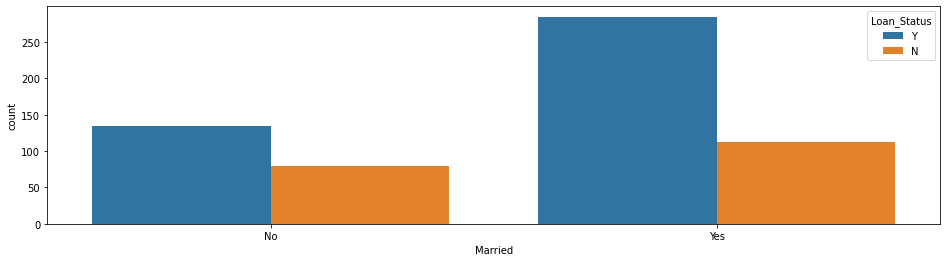

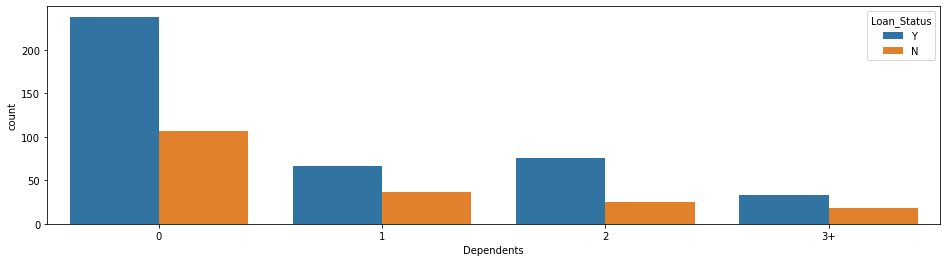

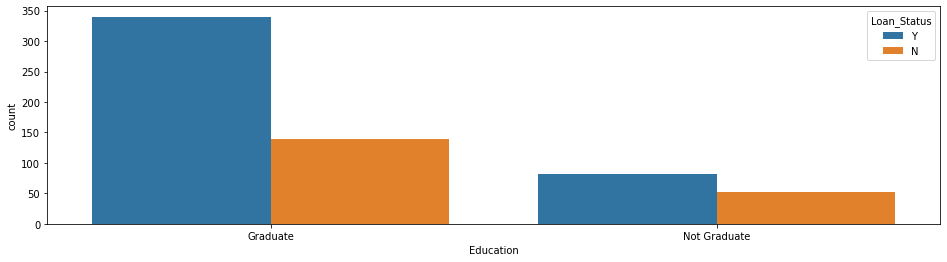

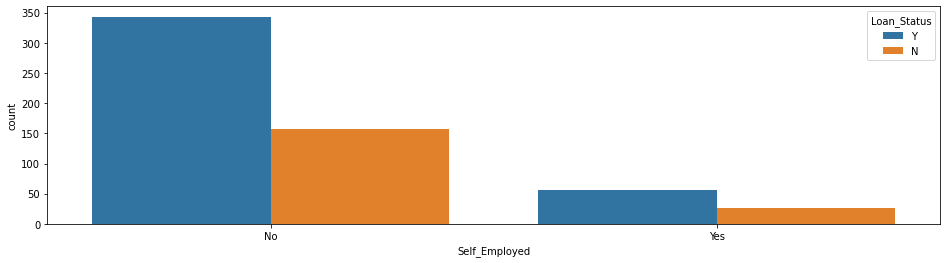

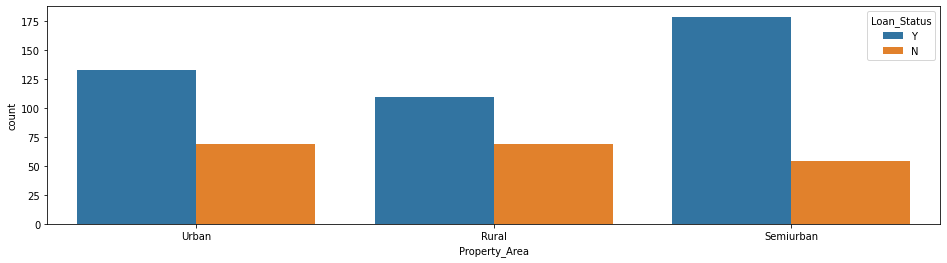

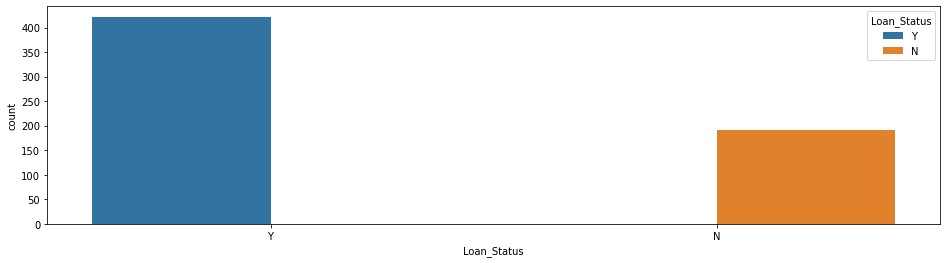

In [41]:
for i in cat_vars:
    plot_cat(i, df)

In [42]:
df.describe() # Observing basic statistical outputs of our data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [43]:
num_vars = [var for var in df.columns if var not in cat_vars and var!='Loan_Status']

Checking the coorelation between our numerical variables

<AxesSubplot:>

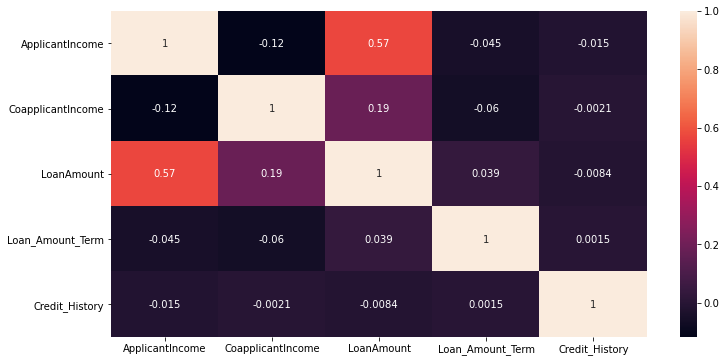

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_vars].corr(), annot=True)

In [45]:
df = df.dropna(axis=0) # Dropping rows containing NaN

### Starting our analysis for best model

I will create dummy variables for the following categorical varriables.

In [46]:
df_dummies = pd.get_dummies(df, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'], drop_first = False)


Defining my X and y variables. 

In [47]:
X = df_dummies.drop(['Loan_ID','Loan_Status'],axis=1) # removing loan ID as it is usless in our analysis
y = df['Loan_Status'].values # Defining X and y variables

Now I will fix the class imbalance by use the SMOTE algorithm

In [48]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

<AxesSubplot:ylabel='count'>

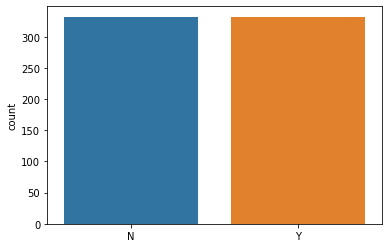

In [49]:
sns.countplot(x=yo) # We have fixed our imbalanced class.

Preparing data for splitting

In [50]:
from sklearn.model_selection import train_test_split # splitting the data
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.2, random_state=41)

Normalizing the data to rmeove any bias

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test) 

In [52]:
print(X_train_sc.shape, X_test_sc.shape) # Checking final shape before proceeding

(531, 20) (133, 20)


In [53]:
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn                        import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report # Importing required libraries

#### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.8421052631578947

In [55]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())

0.7208333333333333


#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=5)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.8872180451127819

In [57]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.7854166666666667


#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
llr = LogisticRegression()
llr.fit(X_train, y_train)
y_pred_rfr = llr.predict(X_test)
llr.score(X_test, y_test)

0.8421052631578947

In [59]:
scr = cross_val_score(llr, X,y, cv=5)
print(scr.mean())

0.79375


#### K-Neighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.5413533834586466

In [61]:
scr = cross_val_score(knn, X,y, cv=5)
print(scr.mean())

0.7


#### Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gba = GradientBoostingClassifier(random_state=1)
gba.fit(X_train, y_train)
y_pred_gba = gba.predict(X_test)
gba.score(X_test,y_test)

0.8947368421052632

In [63]:
scr = cross_val_score(gba, X,y, cv=5)
print(scr.mean())

0.7854166666666667


## Hyper paramter tuning

As Random forest classifier gave me best results and cross validation scores, I will be using hyper parameter tuning to further improve my model.

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = { 'n_estimators' : [100,150],
               'criterion' : ['gini','entropy'], 
              'min_samples_split': [2,3],
              'max_features':['auto','sqrt']
}

In [66]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)


In [67]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [68]:
GCV.best_params_ # These are the best params 

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

Using best paramteres to improve the model.

In [69]:
rfr = RandomForestClassifier(criterion= 'gini', max_features = 'sqrt', n_estimators = 100, min_samples_split = 3)

rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)


0.8796992481203008

In [70]:
print("Random Forrest classifier report \n", classification_report(y_test, y_pred_rfr))

Random Forrest classifier report 
               precision    recall  f1-score   support

           N       0.89      0.86      0.88        66
           Y       0.87      0.90      0.88        67

    accuracy                           0.88       133
   macro avg       0.88      0.88      0.88       133
weighted avg       0.88      0.88      0.88       133



## AU ROC

In [71]:
pd.DataFrame(confusion_matrix(y_test, y_pred_rfr), columns=['Predicted Yes', "Predicted No"], index=['Actual Yes', 'Actual No'])

,Predicted Yes,Predicted No
Actual Yes,57,9
Actual No,7,60


In [72]:
r_probs = [0 for _ in range(len(y_test))]
rfr_probs = rfr.predict_proba(X_test)


In [73]:
rfr_probs = rfr_probs[:, 1]


In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

In [75]:
r_auc = roc_auc_score(y_test, r_probs)
rfr_auc = roc_auc_score(y_test, rfr_probs)


In [76]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rfr_auc))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.916


In [77]:
y_test = (y_test=='Y').astype(int)
y_tesin = (y_train=='Y').astype(int)

In [78]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rfr_fpr, rfr_tpr, _ = roc_curve(y_test, rfr_probs)

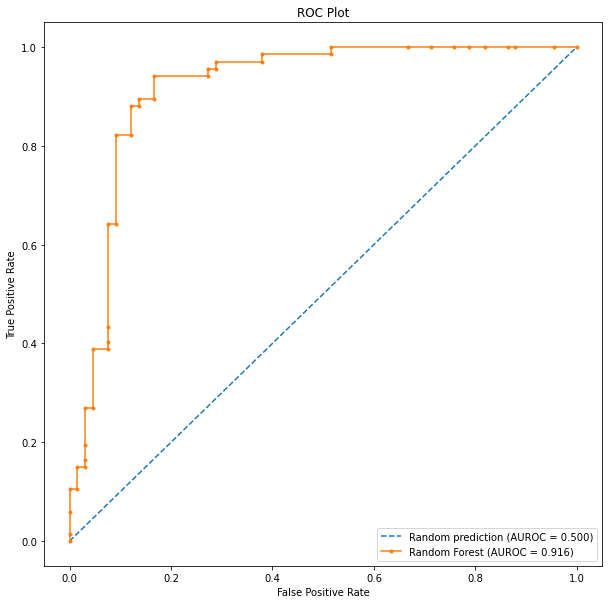

In [79]:
plt.subplots(1, figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rfr_fpr, rfr_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rfr_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot

plt.show()


I have achieved a AUROC score of 0.924 and a model accuracy of 86.4 %

### Saving the model

In [80]:
import joblib
joblib.dump(rfr,"LoanApplicationStatus.pkl")

['LoanApplicationStatus.pkl']